In [144]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import utilities as utils
from sklearn.decomposition import PCA

folder = "video_data_4"

In [145]:
par = utils.read_dict("./outputs/" + folder + "/training_params")

enc_shape = [par["ntestbatch"]*par["batchsize"],-1,par["nenc"]]
lab_shape = [par["ntestbatch"]*par["batchsize"],-1,2]
pro_shape = [par["ntestbatch"]*par["batchsize"],-1,par["nstate"]]
sys_shape = [par["nstate"],par["nenc"],par["nenc"]]
off_shape = [par["nstate"],par["nenc"]]

par

{'batchsize': 8,
 'dataset': 'nascar',
 'device': '0',
 'epochs': 15000,
 'learnpic': False,
 'nenc': 5,
 'nstate': 5,
 'ntestbatch': 100,
 'seed': 0,
 'syspick': 'logistic',
 'tag': 'video_data',
 'train_mode': 'minefirst'}

In [146]:
test_enc = np.reshape(np.loadtxt("./outputs/" + folder + "/nascar_enc.csv"),enc_shape)
test_lab = np.reshape(np.loadtxt("./outputs/" + folder + "/nascar_lab.csv"),lab_shape)
test_sys = np.reshape(np.loadtxt("./outputs/" + folder + "/nascar_sys.csv"),sys_shape)
test_prob = np.reshape(np.loadtxt("./outputs/" + folder + "/nascar_pro.csv"),pro_shape)
test_off = np.reshape(np.loadtxt("./outputs/" + folder + "/nascar_O.csv"),off_shape)

test_S1 = np.reshape(np.loadtxt("./outputs/" + folder + "/nascar_syspick_0.csv"),[par["nstate"],par["nenc"]])
test_S2 = np.reshape(np.loadtxt("./outputs/" + folder + "/nascar_syspick_1.csv"),[par["nstate"]])

print(test_enc.shape)


ValueError: cannot reshape array of size 75 into shape (5,5)

In [111]:
flatenc = np.reshape(test_enc,[-1,par["nenc"]])

pca = PCA(svd_solver='full')
pcaenc=np.reshape(pca.fit_transform(flatenc),enc_shape)

np.mean((pcaenc - test_enc)**2)

0.86619027686298522

In [112]:
ev=pca.explained_variance_

print(np.cumsum(ev)/np.sum(ev))

[ 0.89859271  0.95804659  0.9860044   0.99870917  1.        ]


In [116]:
def labtocolor(lab):
    hsv = np.array([(np.pi + np.arctan2(lab[0],lab[1]))/(2*np.pi),1,np.sqrt(((lab[0]))**2 + ((lab[1])/3.)**2)/np.sqrt(2)])
    return mpl.colors.hsv_to_rgb(hsv)

labtocolor(test_lab[-2,0])

def statetocolor(prob):
    nstate = np.float32(len(prob))
    hsv = np.array([np.float32(np.argmax(prob))/(nstate - 1.),1,1])
    return mpl.colors.hsv_to_rgb(hsv)

print(state_to_color([4,5,3]))

[ 0.25  0.5   0.5 ]


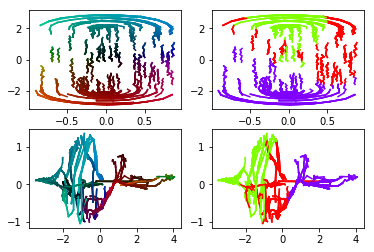

In [117]:
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2)
for k in range(0,len(pcaenc),3):
    for j in range(len(pcaenc[k])-1):
        ax1.plot(test_lab[k,j:j+2,0],test_lab[k,j:j+2,1],color=labtocolor(test_lab[k,j]))
        ax2.plot(test_lab[k,j:j+2,0],test_lab[k,j:j+2,1],color=statetocolor(test_prob[k,j]))
        ax3.plot(pcaenc[k,j:j+2,0],pcaenc[k,j:j+2,1],color=labtocolor(test_lab[k,j]))
        ax4.plot(pcaenc[k,j:j+2,0],pcaenc[k,j:j+2,1],color=statetocolor(test_prob[k,j]))
plt.show()

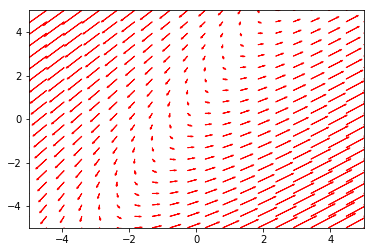

In [141]:
def getsys(x,y,a1,a2):
    

plt.ylim([-5,5])
plt.xlim(-5,5)

scale = 2

for a in np.linspace(-5,5,20):
    for b in np.linspace(-5,5,20):
        sysid = 4
        sys = pca.transform(test_sys[sysid])
        off = pca.transform([test_off[sysid]])

        vec = (np.dot(sys[:2,:2],np.array([a,b])) + off[0,:2])/scale
        plt.arrow(a,b,vec[0],vec[1],color=mpl.colors.hsv_to_rgb([sysid/(test_sys.shape[0]-1),1,1]),head_width = .05,width = .001)
plt.show()

In [127]:
plt.arrow(0,0,1,.1)

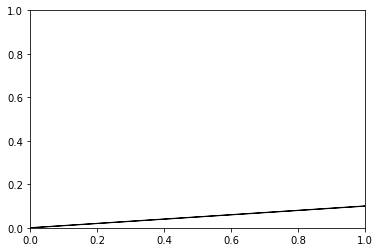

In [128]:
plt.show()